In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("mushrooms.csv", delimiter=',', nrows = 70000)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.shape

(8124, 23)

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df = df.replace(['?'], 'b')

Text(0.5, 1.0, 'Mushroom class distribution')

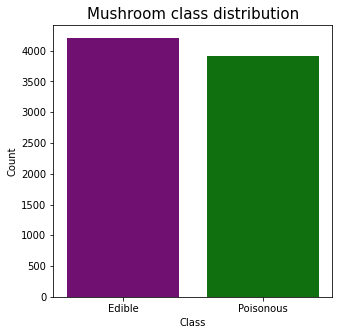

In [125]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='class', order=df['class'].value_counts().index, 
                      palette=['purple', 'green'], linewidth=2)                  
splot.set_xticklabels(['Edible', 'Poisonous'])

plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Mushroom class distribution', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and cap shape')

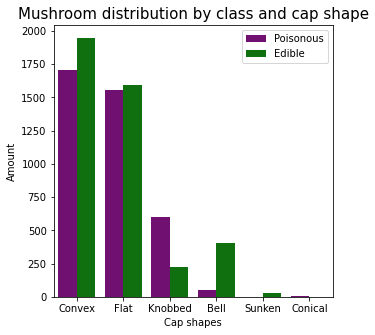

In [94]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='cap-shape', hue='class', order=df['cap-shape'].value_counts().index, 
                      palette=['purple', 'green'], linewidth=2)                  
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Cap shapes')
plt.title('Mushroom distribution by class and cap shape', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and bruise type')

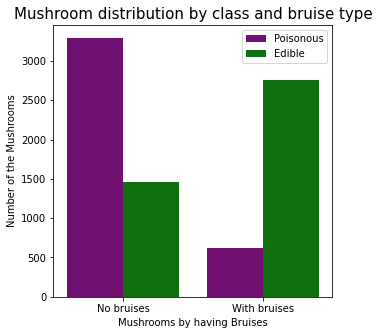

In [96]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='bruises', hue='class', order=df['bruises'].value_counts().index, 
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['No bruises', 'With bruises'])   

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms')
plt.xlabel('Mushrooms by having Bruises')
plt.title('Mushroom distribution by class and bruise type', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and odor')

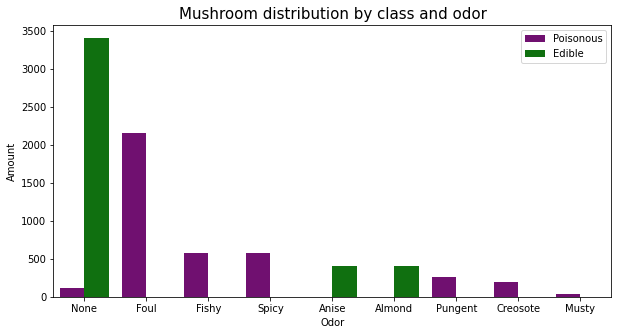

In [98]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=df, x='odor', hue='class', order=df['odor'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['None', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent',
                       'Creosote', 'Musty'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Odor')
plt.title('Mushroom distribution by class and odor', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and gill attachment type')

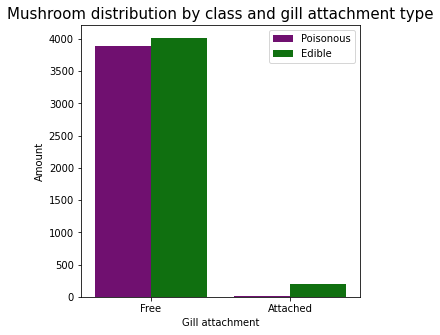

In [99]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='gill-attachment', hue='class', order=df['gill-attachment'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Free', 'Attached'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Gill attachment')
plt.title('Mushroom distribution by class and gill attachment type', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and gill spacing')

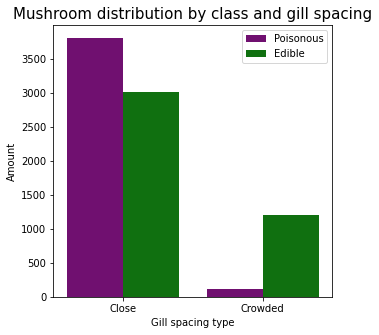

In [100]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='gill-spacing', hue='class', order=df['gill-spacing'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Close', 'Crowded'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Gill spacing type')
plt.title('Mushroom distribution by class and gill spacing', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and gill color')

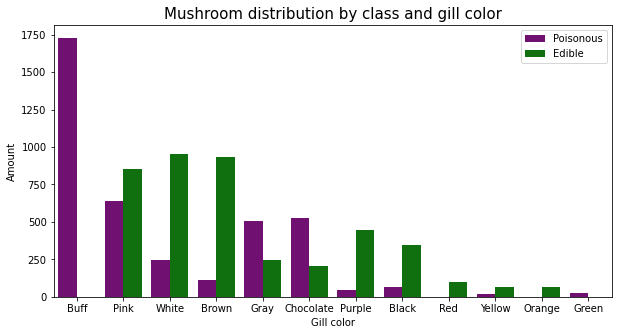

In [102]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=df, x='gill-color', hue='class', order=df['gill-color'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)   
splot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red',
                       'Yellow', 'Orange', 'Green'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Gill color')
plt.title('Mushroom distribution by class and gill color', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and stalk type')

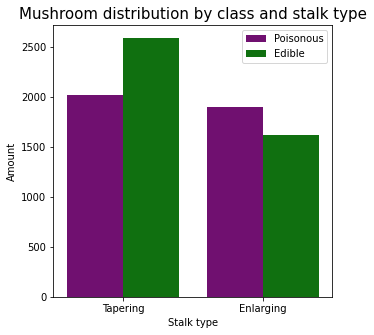

In [103]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='stalk-shape', hue='class', order=df['stalk-shape'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)    
splot.set_xticklabels(['Tapering', 'Enlarging'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Stalk type')
plt.title('Mushroom distribution by class and stalk type', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and stalk root type')

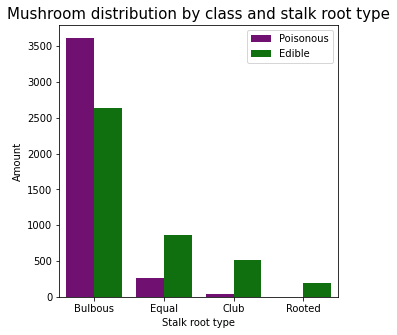

In [104]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='stalk-root', hue='class', order=df['stalk-root'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Bulbous', 'Equal', 'Club', 'Rooted'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Stalk root type')
plt.title('Mushroom distribution by class and stalk root type', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and stalk surface type (above ring)')

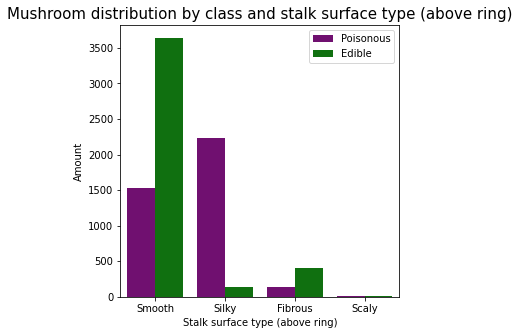

In [106]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='stalk-surface-above-ring', hue='class', order=df['stalk-surface-above-ring'].value_counts().index,
                        palette=['purple', 'green'], linewidth=2)                      
splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Stalk surface type (above ring)')
plt.title('Mushroom distribution by class and stalk surface type (above ring)', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and stalk surface type (below ring)')

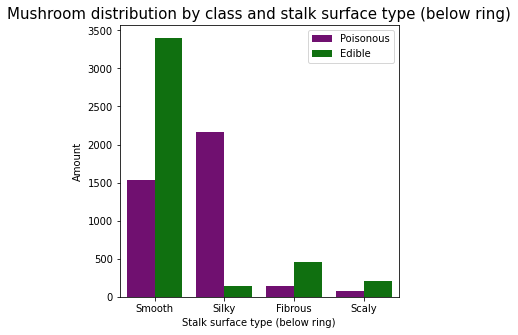

In [107]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='stalk-surface-below-ring', hue='class', order=df['stalk-surface-below-ring'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Stalk surface type (below ring)')
plt.title('Mushroom distribution by class and stalk surface type (below ring)', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and veil type')

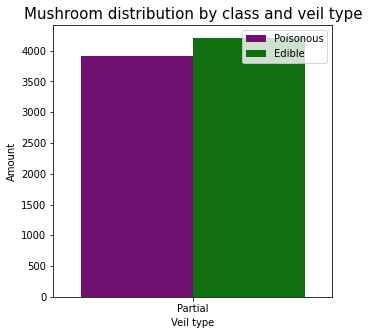

In [108]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='veil-type', hue='class', order=df['veil-type'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Partial'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Veil type')
plt.title('Mushroom distribution by class and veil type', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and veil color')

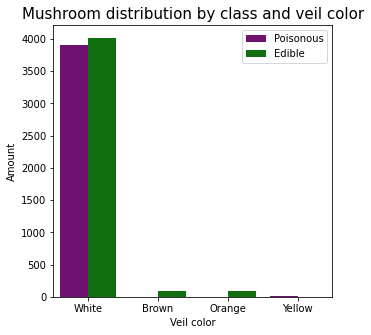

In [109]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='veil-color', hue='class', order=df['veil-color'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['White', 'Brown', 'Orange', 'Yellow'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Veil color')
plt.title('Mushroom distribution by class and veil color', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and ring type')

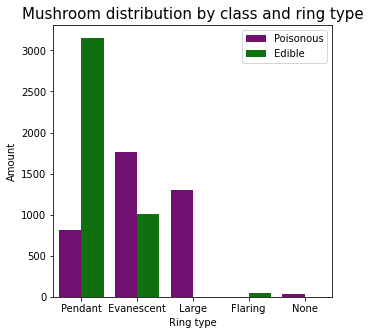

In [110]:
plt.figure(figsize=(5, 5))
splot = sns.countplot(data=df, x='ring-type', hue='class', order=df['ring-type'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Pendant', 'Evanescent', 'Large', 'Flaring', 'None'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Ring type')
plt.title('Mushroom distribution by class and ring type', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and spore print color')

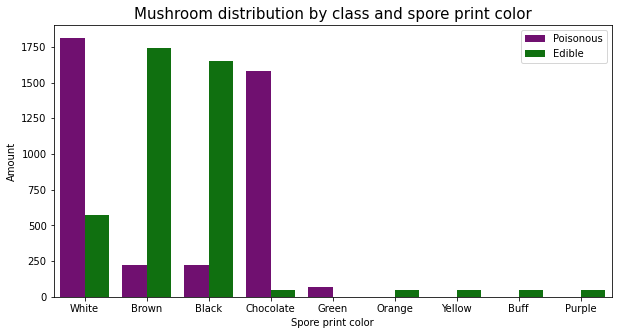

In [112]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=df, x='spore-print-color', hue='class', order=df['spore-print-color'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['White', 'Brown', 'Black', 'Chocolate', 'Green', 'Orange', 'Yellow', 'Buff', 'Purple'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Spore print color')
plt.title('Mushroom distribution by class and spore print color', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and population')

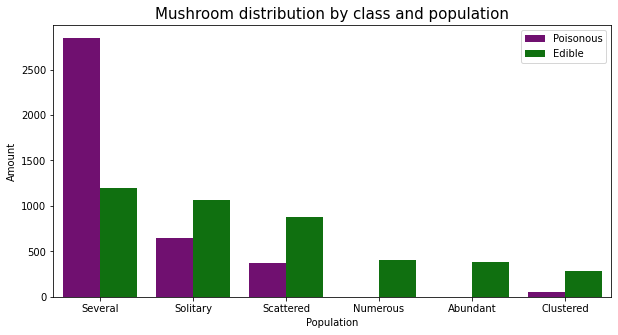

In [113]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=df, x='population', hue='class', order=df['population'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Population')
plt.title('Mushroom distribution by class and population', fontsize=15)

Text(0.5, 1.0, 'Mushroom distribution by class and habitat')

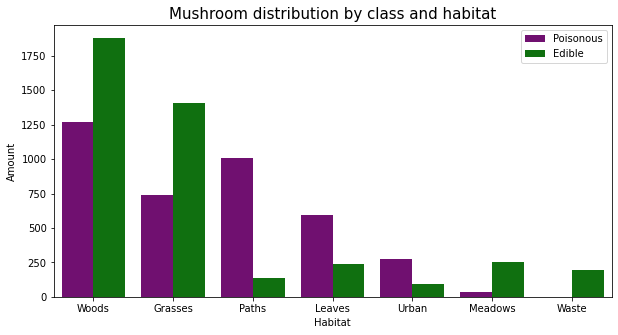

In [115]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=df, x='habitat', hue='class', order=df['habitat'].value_counts().index,
                      palette=['purple', 'green'], linewidth=2)
splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Amount')
plt.xlabel('Habitat')
plt.title('Mushroom distribution by class and habitat', fontsize=15)

In [116]:
y = df['class']
X = df.drop(['class'],axis=1)

X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [27]:
#yeah this part is pre-processing and i probably shouldve done this sooner but the graphs just worked out better with 
#categorical soooo

In [35]:
from sklearn.preprocessing import LabelEncoder

#labelencoder SHOULD NOT be used for feature variables; only target variables
en = LabelEncoder()
y = en.fit_transform(y)

In [51]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [88]:
dTree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [89]:
pred = dTree.predict(X_test)

acc = accuracy_score(y_test, pred)
acc

0.9636923076923077

[Text(0.5, 0.875, 'X[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.2, 0.625, 'X[21] <= 0.5\nentropy = 0.667\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.1, 0.375, 'entropy = 0.0\nsamples = 2583\nvalue = [0, 2583]'),
 Text(0.3, 0.375, 'X[52] <= 0.5\nentropy = 0.976\nsamples = 1077\nvalue = [637, 440]'),
 Text(0.2, 0.125, 'entropy = 0.933\nsamples = 676\nvalue = [236, 440]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.8, 0.625, 'X[99] <= 0.5\nentropy = 0.199\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.7, 0.375, 'X[62] <= 0.5\nentropy = 0.093\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.6, 0.125, 'entropy = 0.012\nsamples = 2740\nvalue = [2737, 3]'),
 Text(0.8, 0.125, 'entropy = 0.902\nsamples = 44\nvalue = [14, 30]'),
 Text(0.9, 0.375, 'entropy = 0.0\nsamples = 55\nvalue = [0, 55]')]

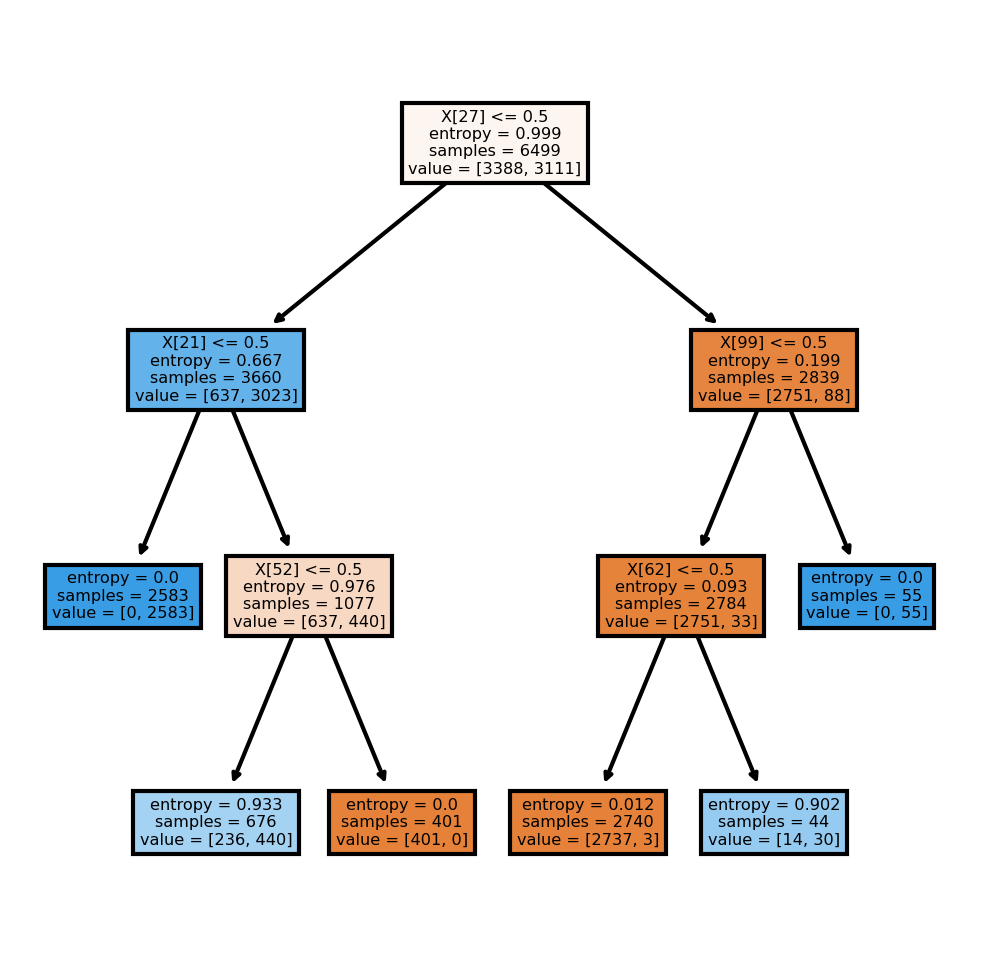

In [90]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dTree, filled = True)